In [7]:
import sys
sys.path.append("../src")

from CSOWP_SR import *
from ExpressionTree import *
from rollingWindow import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pysr import PySRRegressor
import numpy as np
import sympy as smp

import itertools

In [8]:
def t1(X):
    return 10*np.exp(-0.5*np.exp(-0.5*X + 2))
X1 = np.linspace(-5, 15, 140)
y1 = t1(X1)

def t2(X):
    return np.exp(-X)
X2 = np.linspace(1, 20, 140)
y2 = t2(X2)

air_passengers = pd.read_csv("data/AirPassengers.csv")
X3 = air_passengers.index
y3 = air_passengers["#Passengers"]

treated_seco = pd.read_csv("data/treated_seco.csv")
treated_seco

treated_seco["eventdate"] = pd.to_datetime(treated_seco["eventdate"])
treated_seco.set_index("eventdate", inplace=True, drop=True)
treated_seco = treated_seco.asfreq("7D")
treated_seco.rename(columns={"Unnamed: 0": "weeks"}, inplace=True)

X4 = treated_seco.weeks[::2].values
y4 = treated_seco.value[::2].values

data = [
    [X1, y1],
    [X2, y2],
    [X3, y3],
    [X4, y4]
]

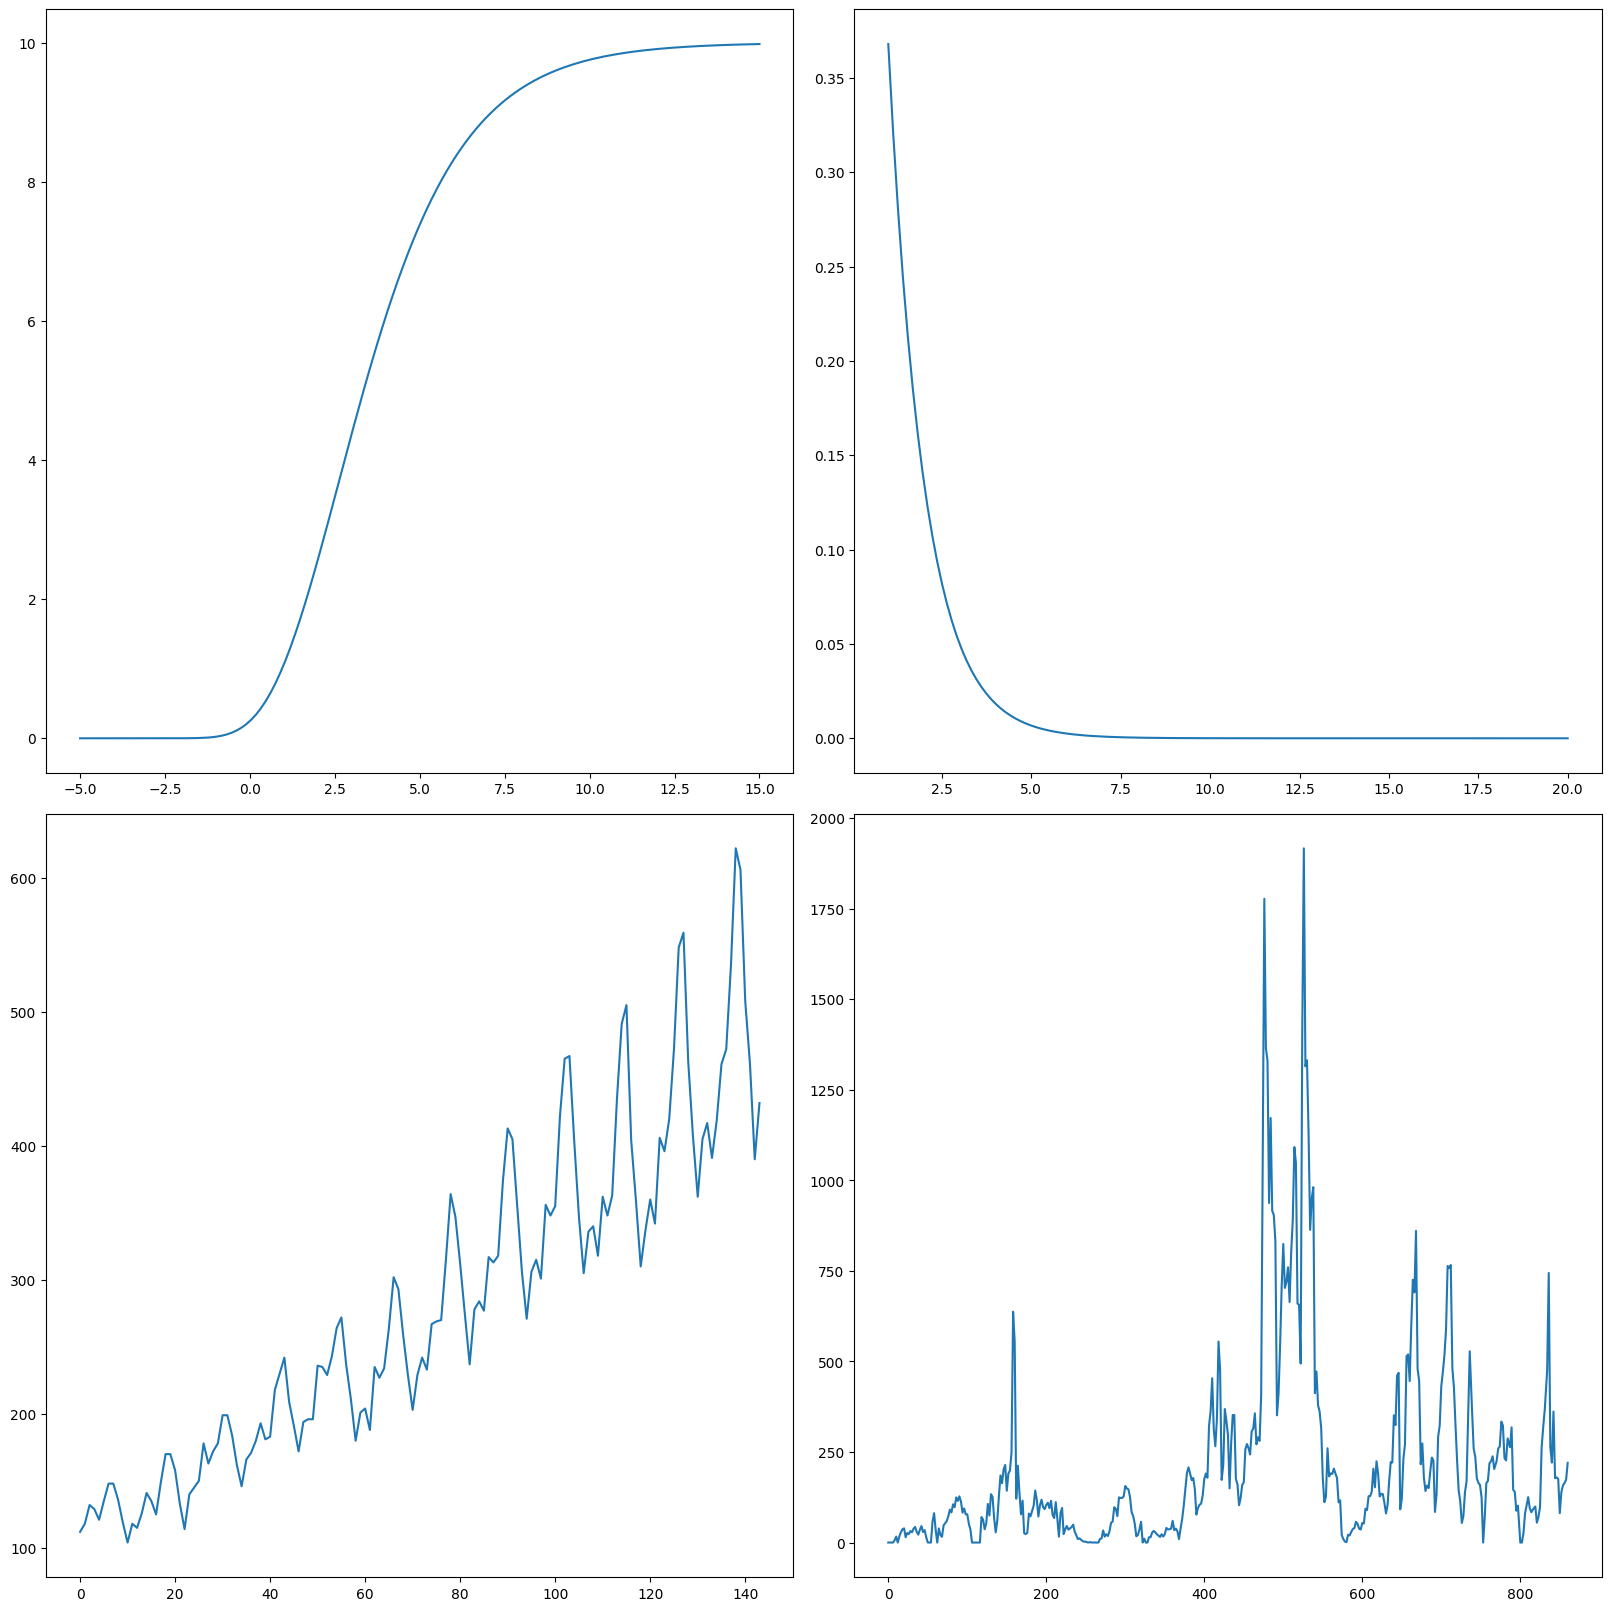

In [9]:
fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(16, 16))

for ax, current_data in zip(axs.flatten(), data):
    ax.plot(current_data[0], current_data[1])

In [10]:
pyreg = PySRRegressor(
    binary_operators=["+", "-", "*", "/"], 
    unary_operators=["exp", "expp(x) = exp(-x)", "cos", "sin"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    extra_sympy_mappings={"expp": lambda x: smp.exp(-x)},
    niterations=60,
    populations=20,
    population_size=60
)

# pyreg.fit(np.c_[X4], y4)

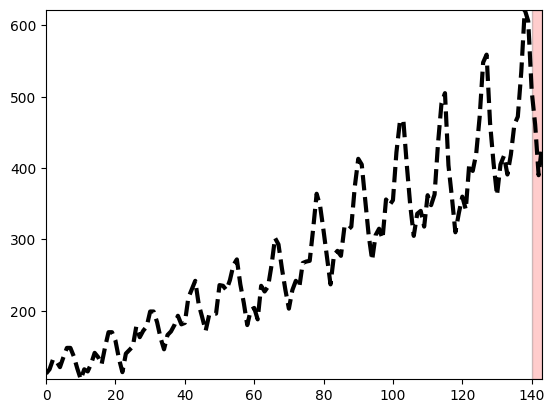

Running: 143-142|0

Running: 143-141|0



e:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\Lib\site-packages\pysr\sr.py:1989: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


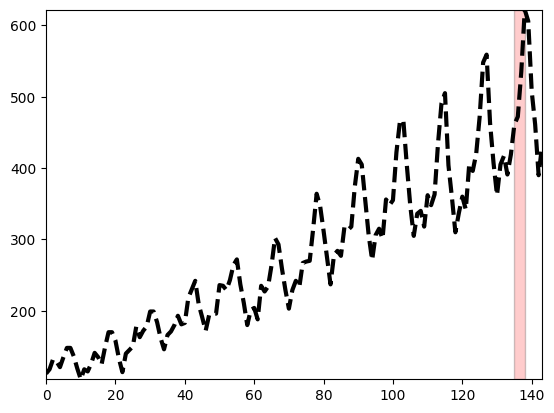

Running: 138-137|0

Running: 138-136|0



e:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\Lib\site-packages\pysr\sr.py:1989: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


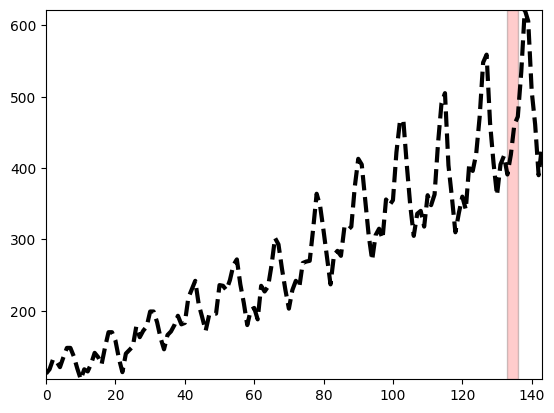

Running: 136-135|0

Running: 136-134|0



e:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\Lib\site-packages\pysr\sr.py:1989: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


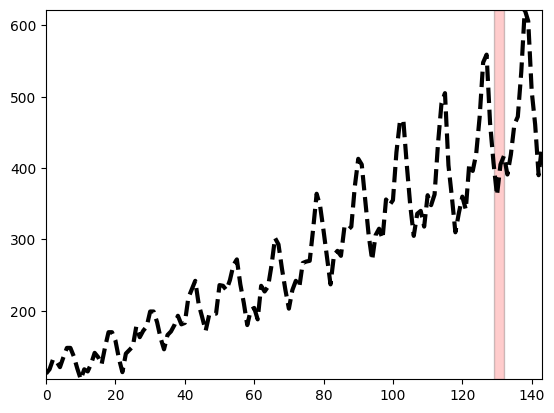

Running: 132-131|0

Running: 132-130|0



e:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\Lib\site-packages\pysr\sr.py:1989: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


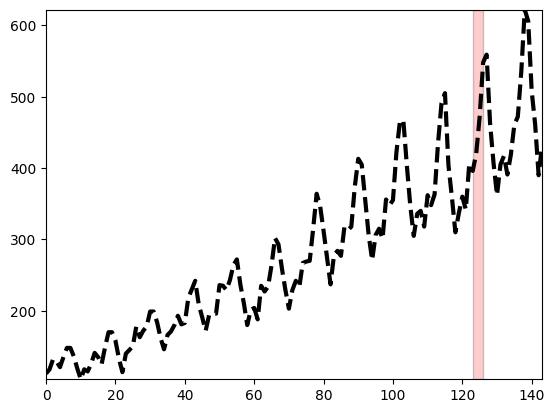

Running: 126-125|0

Running: 126-124|0



e:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\Lib\site-packages\pysr\sr.py:1989: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


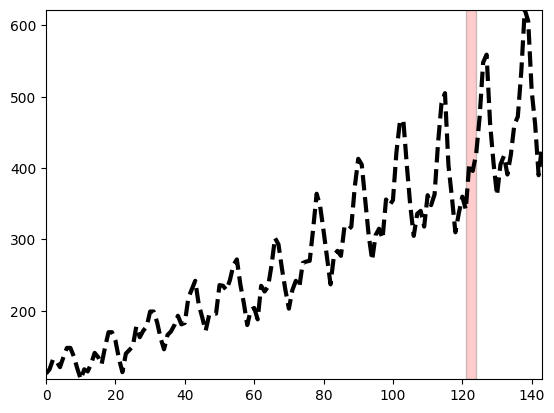

Running: 124-123|0

Running: 124-122|0



e:\Documents\Coding\Repositorios\MyRepositories\Versatus\Janela_Movel\.venv\Lib\site-packages\pysr\sr.py:1989: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(


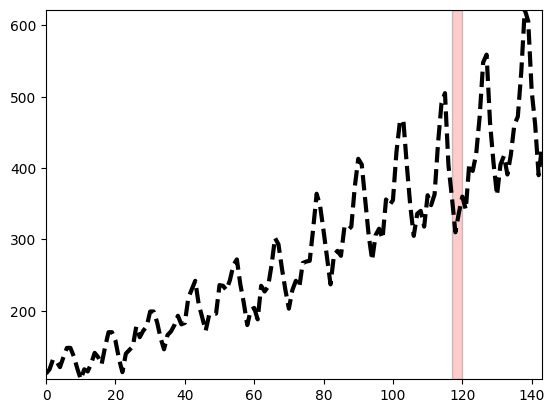

Running: 120-119|0



KeyboardInterrupt: 

In [11]:
class rollingSR():
    def __init__(self):
        self.SR = PySRRegressor(
            binary_operators=["+", "-", "*", "/"], 
            unary_operators=["exp", "expp(x) = exp(-x)", "cos", "sin"],
            temp_equation_file=True,
            elementwise_loss="loss(prediction, target) = (prediction - target)^2",
            extra_sympy_mappings={"expp": lambda x: smp.exp(-x)},
            niterations=60,
            populations=20,
            population_size=60,
            warm_start=False,
            verbosity=False,
            progress=False
        )

    def fit(self, X, y):
        self.SR.fit(X, y)

    def get_solutions(self):
        return self.SR.sympy().simplify()

RoWi = SRRollingMetric(dir_path="Outputs/Airplane")

start_point_options = [-1, -6, -8, -12, -18, -20, -24]

for start in start_point_options:
    RoWi.fit(X3, y3, rollingSR, direction="left", start=X3[start], n_points=3, visualize=True)
    RoWi.run()
    plt.plot()




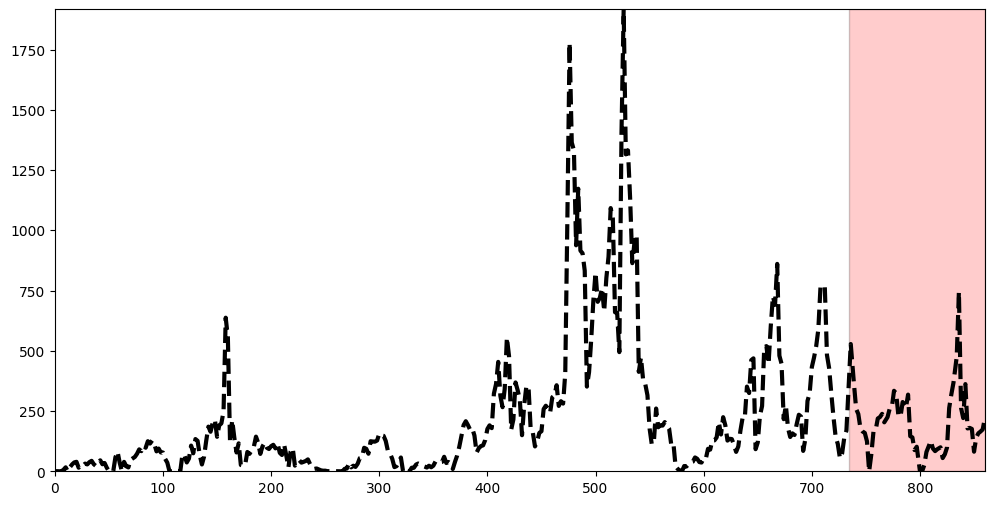

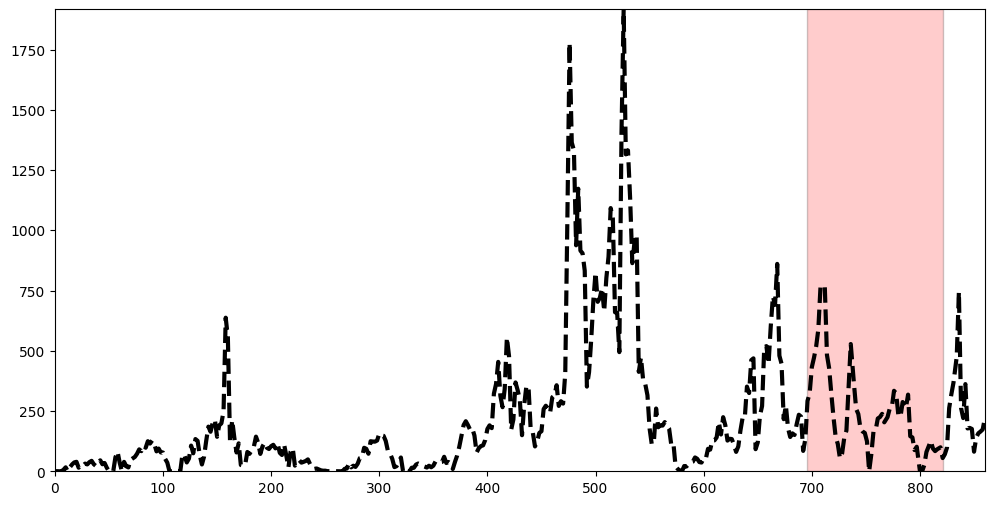

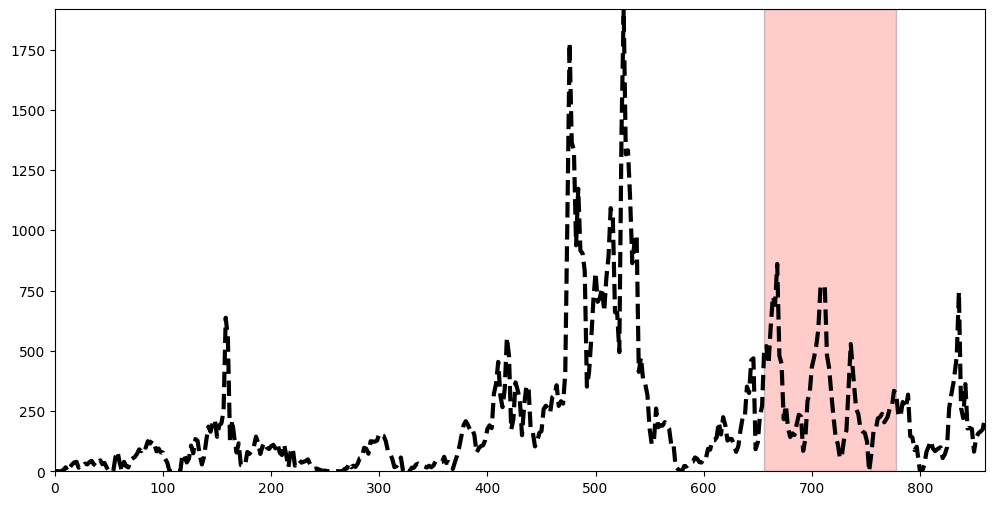

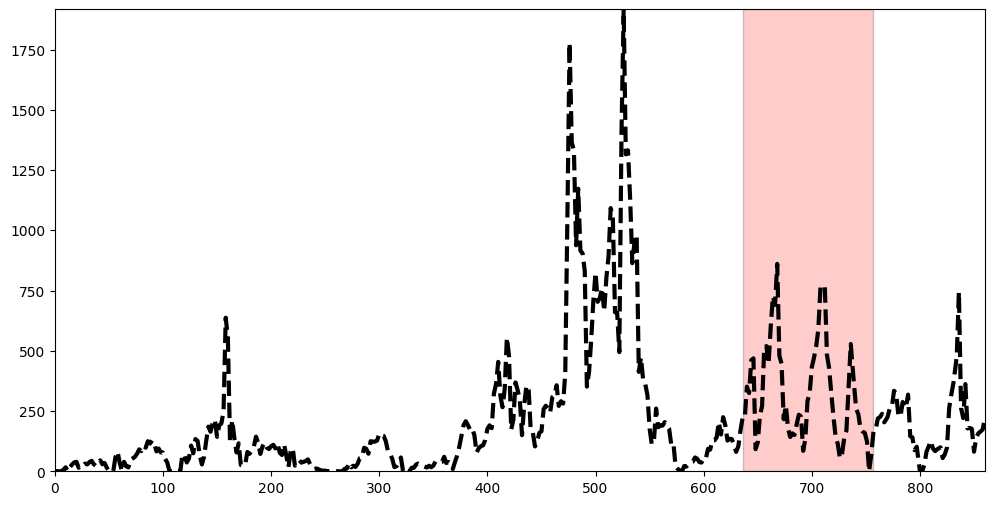

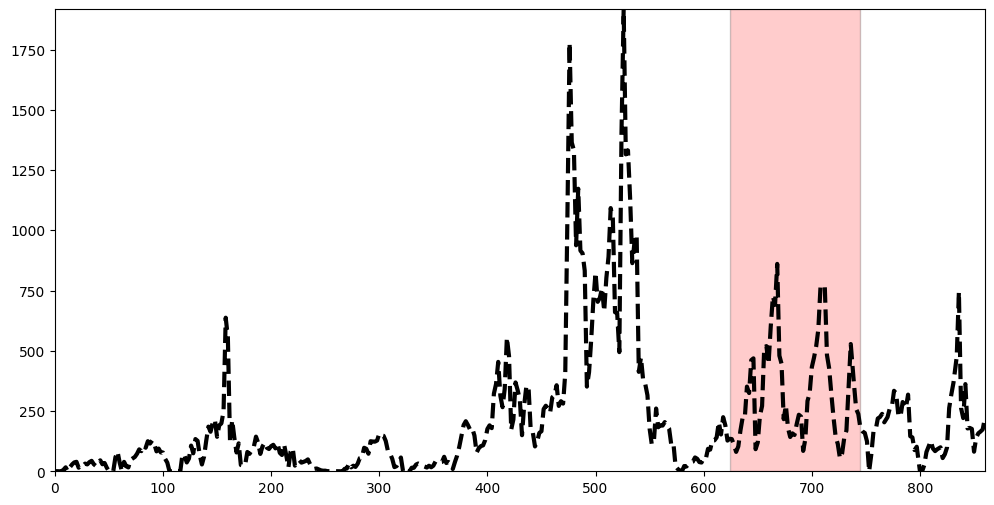

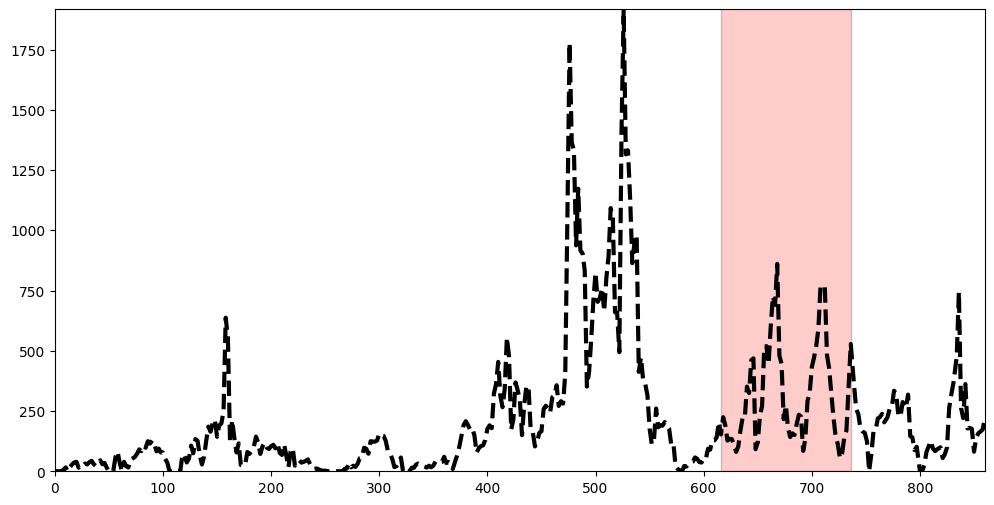

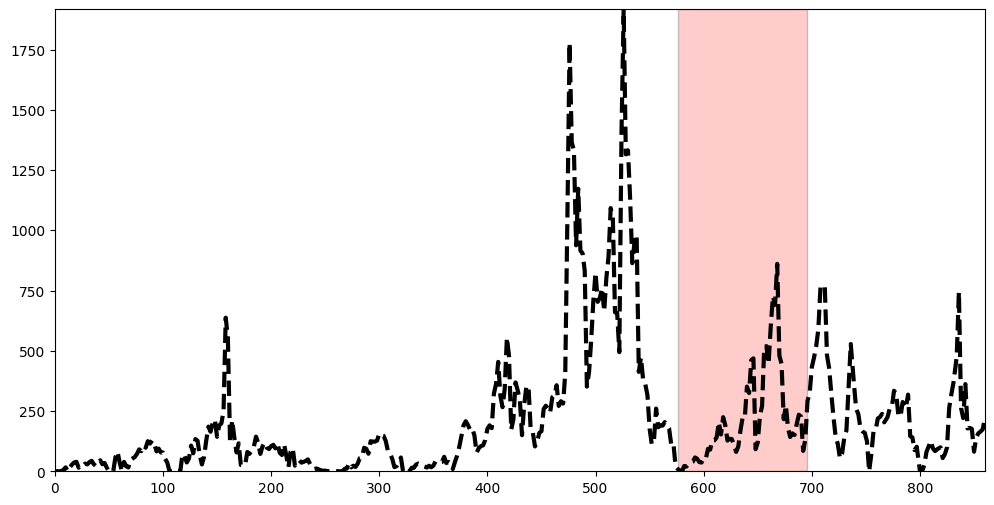

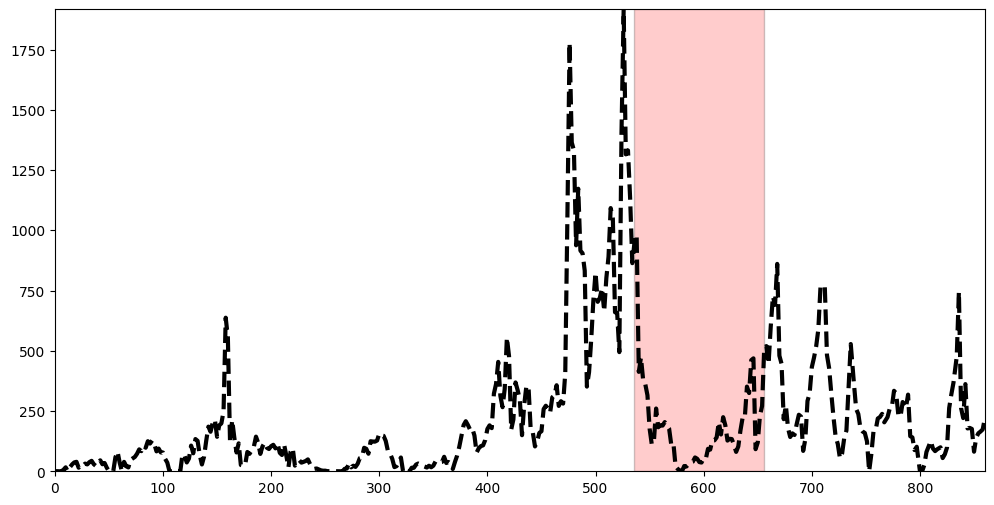

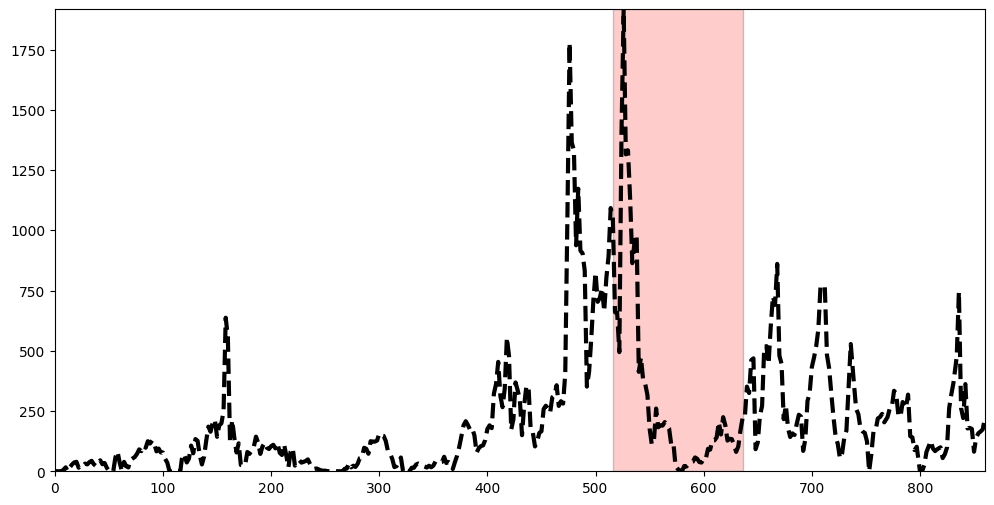

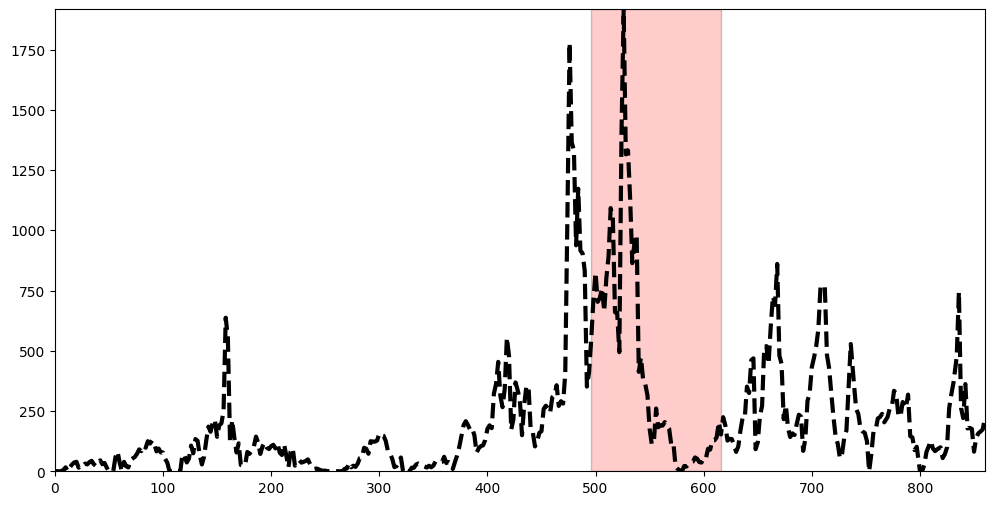

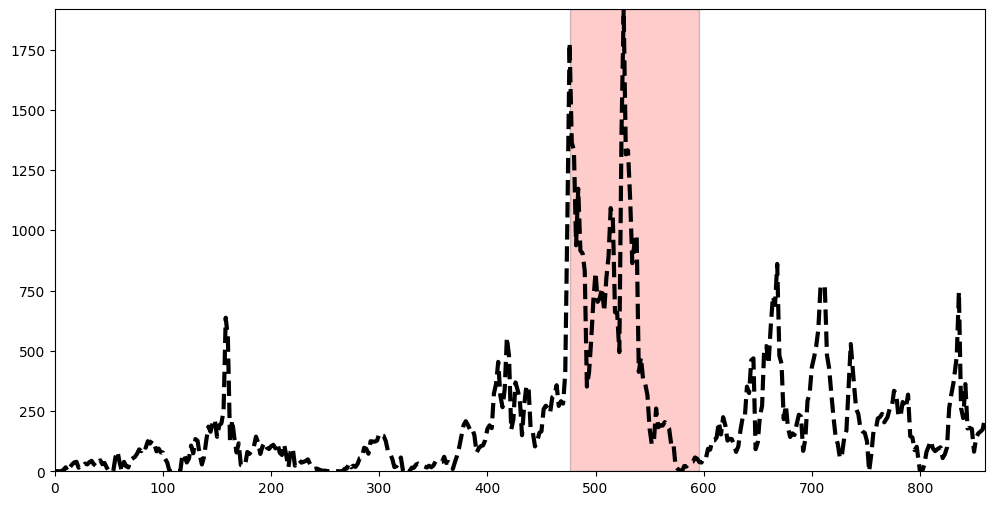

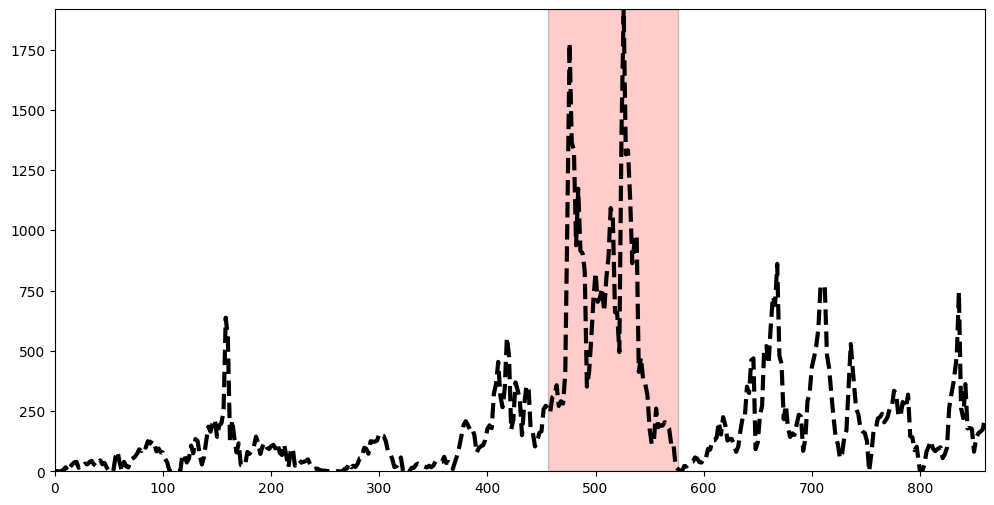

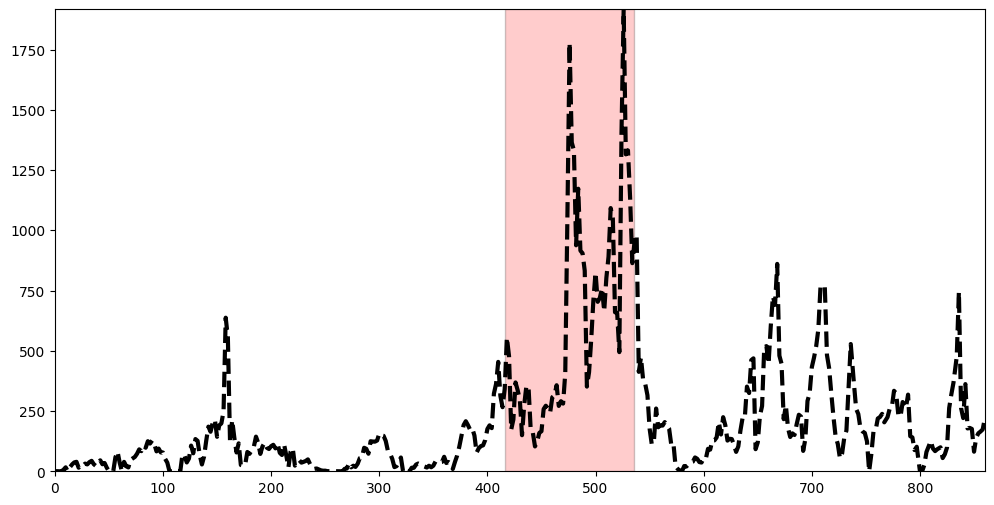

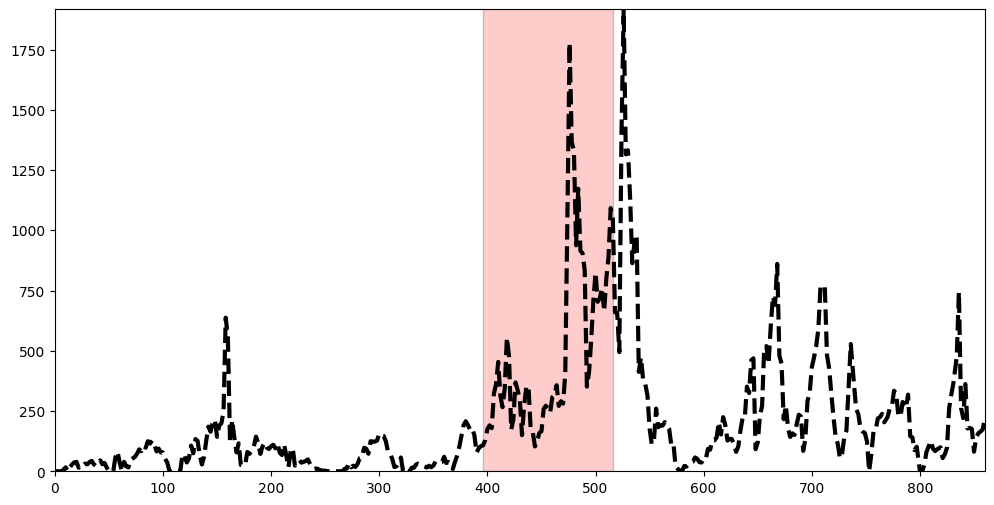

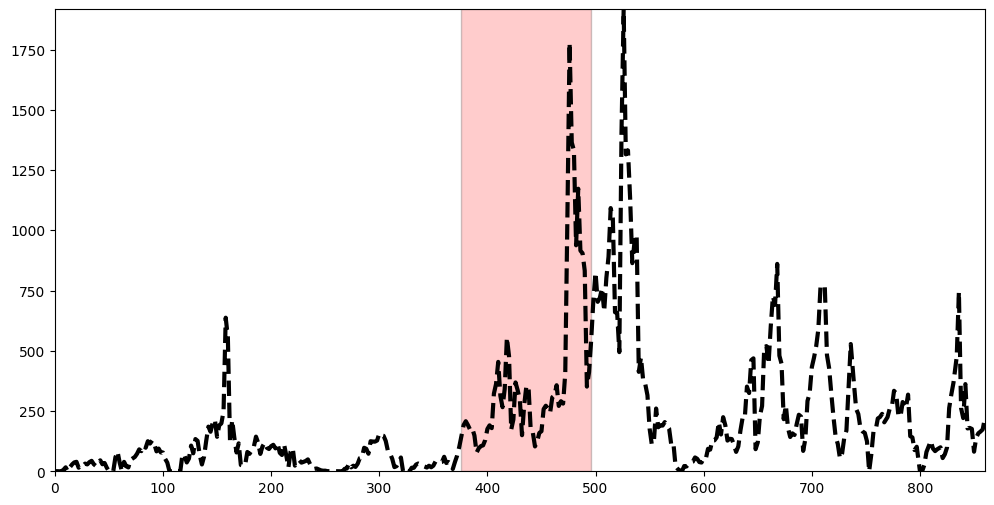

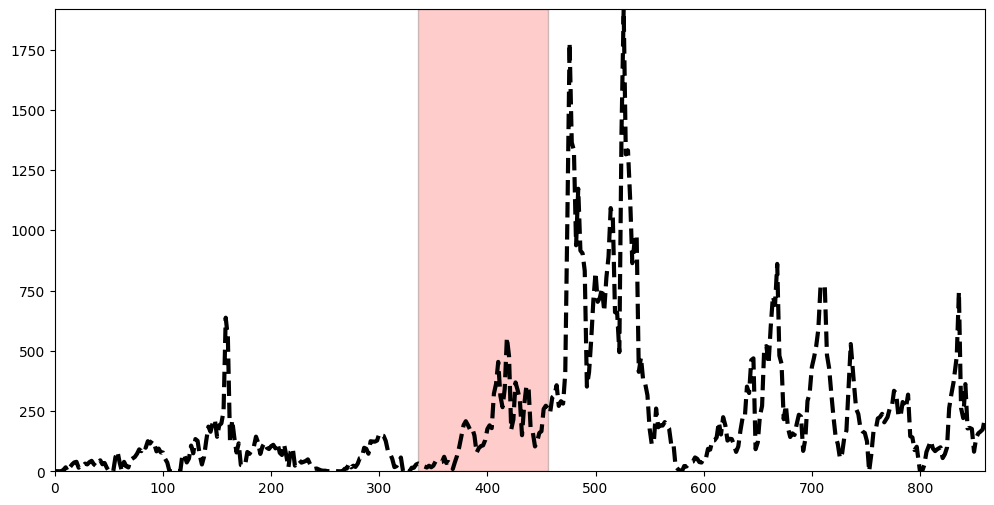

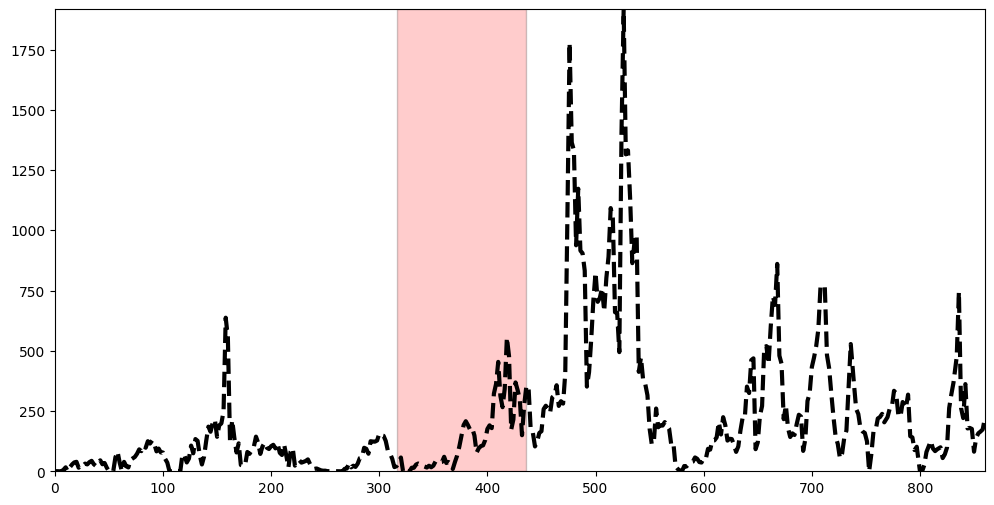

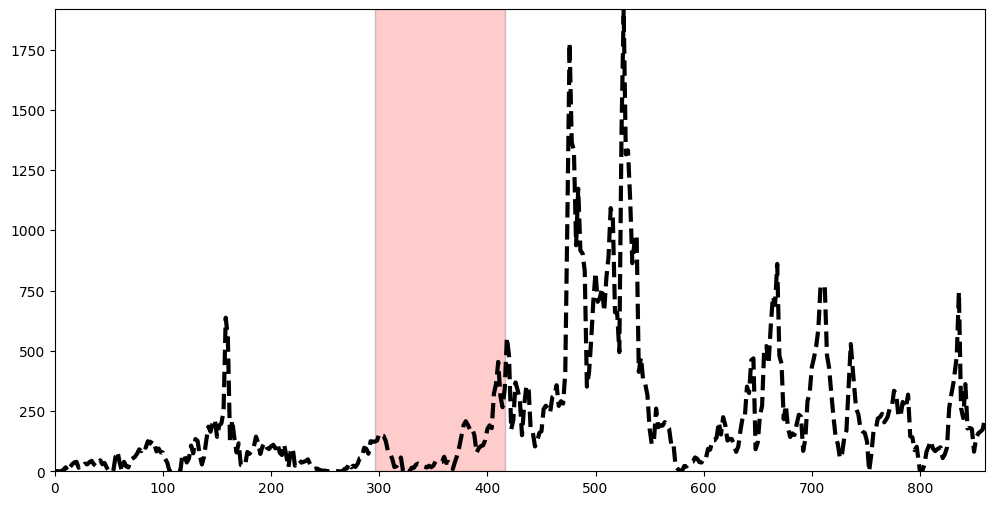

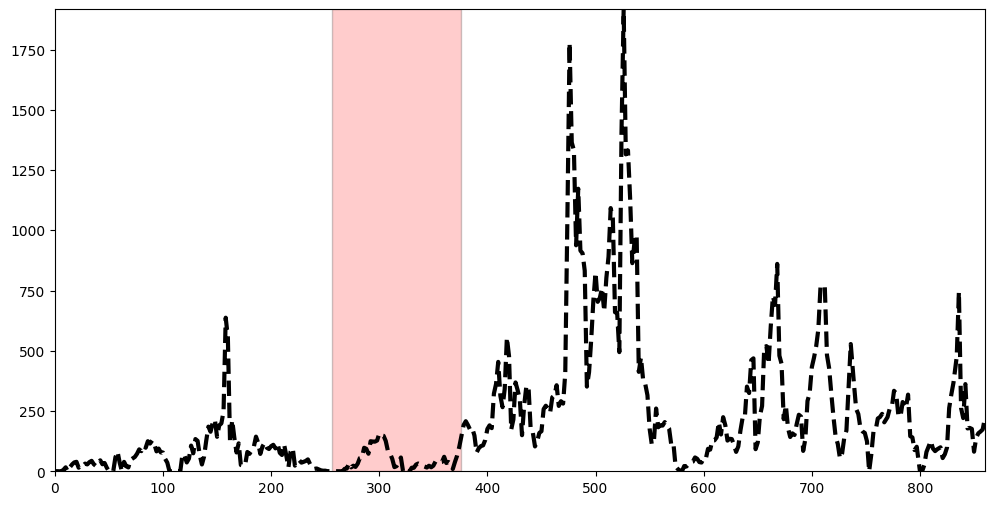

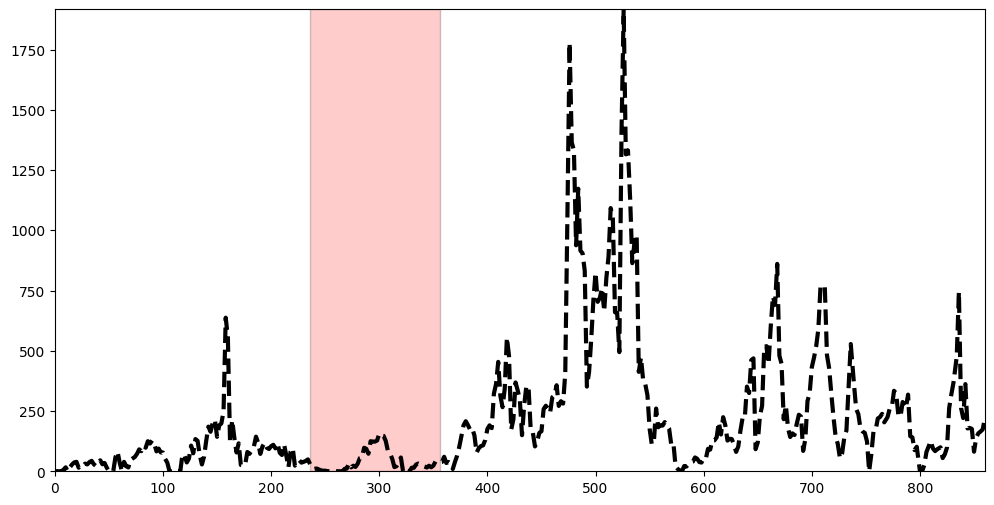

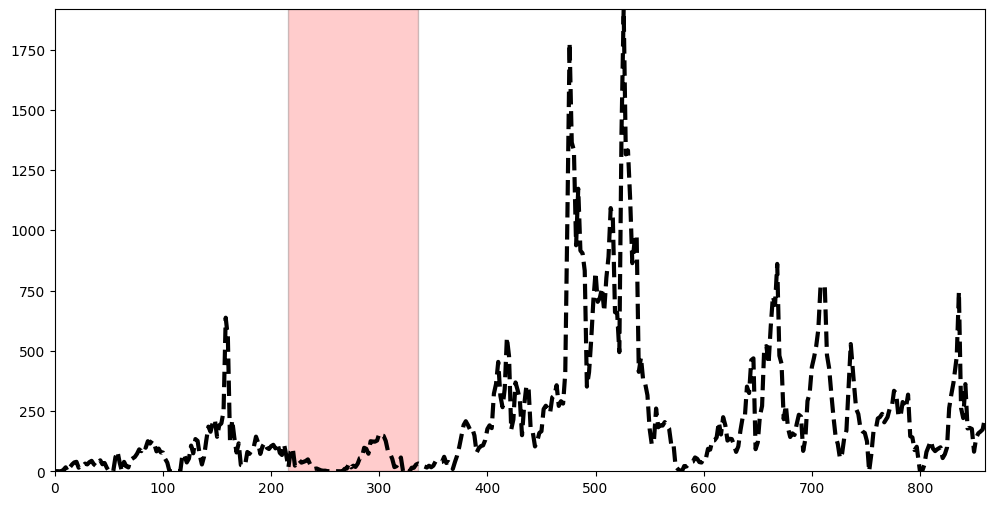

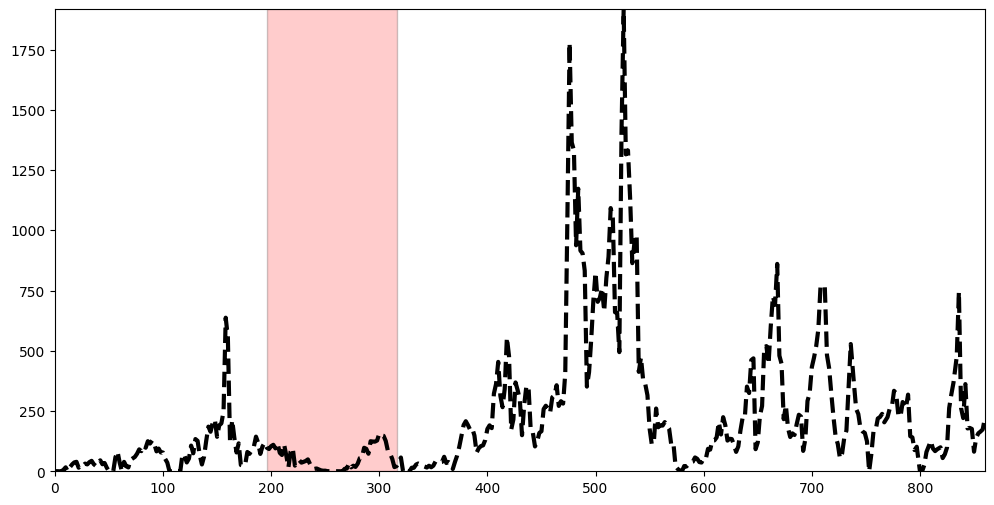

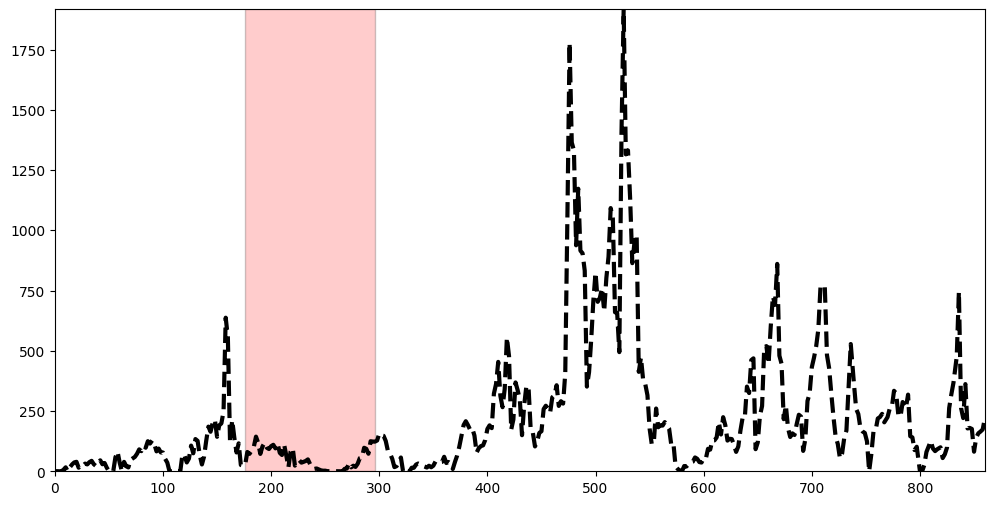

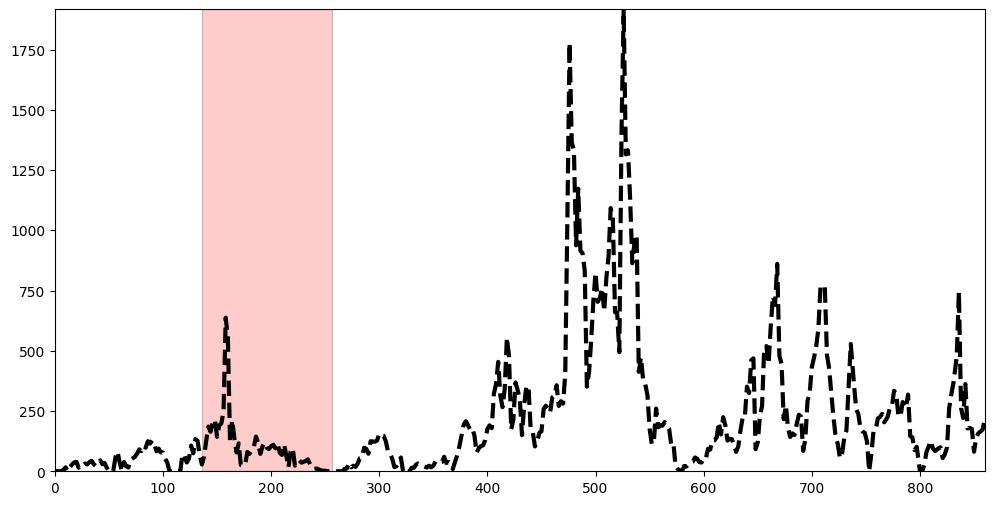

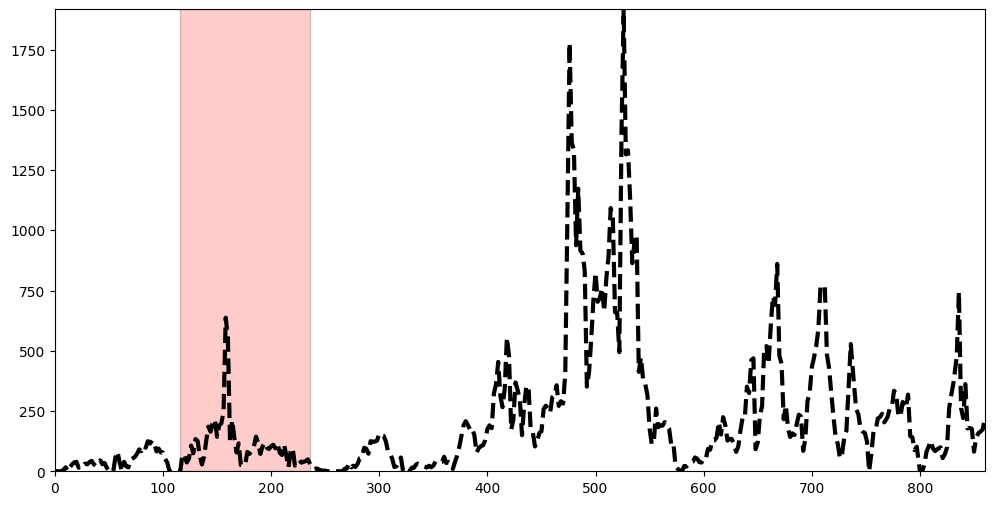

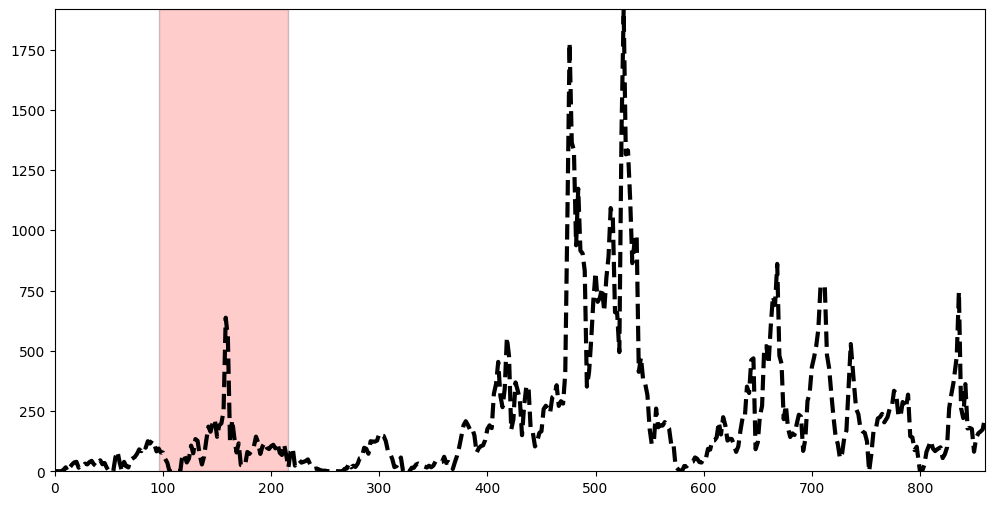

In [122]:
start_points1 = [-1, -20, -40, -50, -56, -60, -80, -100, -110, -120, -130]
start_points2 = [-140, -160, -170, -180, -200, -210, -220]
start_points3 = [-240, -250, -260, -270, -280, -300, -310, -320]

start_points = start_points1 + start_points2 + start_points3


for start in start_points:
    plt.figure(figsize=(12, 6))
    RoWi.fit(X4, y4, rollingSR, direction="left", start=X4[start], n_points=60
    , visualize=True)
    plt.show()

In [23]:
if type(50) is not int:
    print("oi")

In [10]:
RoWi.solutions



{'143-142|0': 390.000020000000,
 '143-141|0': -578.58856*cos(x0) - 78.08388,
 '143-140|0': 75.60217*sin(x0) + 434.09672079 - 0.200930040000002/sin(x0),
 '143-139|0': -73.381195*x0 - 76.5528619835404*cos(cos(x0 - 0.17046914)) + 10857.8934900122,
 '143-138|0': -60.95177*x0 + 9039.427 + 4.82863372070565*cos(x0 - 0.3717609)/sin(sin(sin(x0) - 0.5823723)),
 '143-137|0': 1.06833124640166*x0*cos(x0)*cos(1.2985885*sin(x0 - 0.52353764) + 0.18163316) + 512.574953,
 '143-136|0': 109.13026*exp(cos(0.544976769275256*x0)) + 15.7270810427495*cos(2*x0) + 321.22604,
 '143-135|0': -7.868289*x0 + 7.868289*sin(2.7774403*x0) - 95.32152*sin(x0 - 1.8874835) + 1612.9152,
 '143-134|0': x0*(sin(0.33011526*x0) + sin(cos(x0) - 1.0522736)) + 16.9620552040264*sin(x0) + 506.95343,
 '143-133|0': 121.542133759908*cos(0.6840468*x0) + 516.144366928267 - 1.0*exp(-4.70488425326053*sin(0.6790036*x0)),
 '143-132|0': 1.0*x0*exp(-0.7180835*cos(476.8632*x0)) + 331.2379403 - 1.2405255/cos(2.96681269912134*x0)}

In [9]:
type("asdasd") is str

True